In [34]:
# Impoort necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import keras
import tensorflow as tf


## Load the dataset

In [35]:
ipl_data = pd.read_csv('ipl_data.csv')

In [36]:
ipl_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [37]:
# let's check the data
print(ipl_data.shape)

(76014, 15)


We can observe there are 76014 rows and 15 columns, in the given dataset.

In [38]:
print(ipl_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB
None


In [39]:
# Let's check for null values
ipl_data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

This is great we do not have any null values in this data, usually having null values would make us work with them and use method to deal with them. But since there are no null values let's proceed further.

In [40]:
# let's check the datatypes
print(ipl_data.dtypes)

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object


In [41]:
# Now let's check how many teams are there in the dataset
ipl_data['bat_team'].value_counts().count()
ipl_data['bat_team'].value_counts()
# 
print(ipl_data['bowl_team'].value_counts())


bowl_team
Delhi Daredevils               10245
Royal Challengers Bangalore     9661
Mumbai Indians                  9271
Kolkata Knight Riders           9211
Kings XI Punjab                 8405
Rajasthan Royals                7773
Chennai Super Kings             6497
Deccan Chargers                 3984
Sunrisers Hyderabad             3589
Pune Warriors                   3083
Gujarat Lions                   1970
Rising Pune Supergiant           962
Kochi Tuskers Kerala             736
Rising Pune Supergiants          627
Name: count, dtype: int64


There are 14 teams in total. Currently, there are only 9 teams in playing, we can either choose to drop the teams that are not existing currently or keep them for further analysis. However, we can also observe there are two entries for $Rising Super Giants$ have appeared twice. As there seems to be a typo. Let's check that further.

In [42]:
# Check for descriptive statistics
ipl_data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [43]:
# Lets get the count of the teams
ipl_data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

We will work on some EDA slicing, feature transformation and other activities. It is usually a good practice to create a copy of the new dataset.

In [44]:
ipl_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [45]:
new_data = ipl_data.copy()

In [46]:
# Let's merge Pune Supergiants and Rising Pune Supergiants
new_data['bat_team'] = new_data['bat_team'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

# Lets check
new_data['bat_team'].value_counts()
# This is better

bat_team
Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Rising Pune Supergiant          1735
Gujarat Lions                   1726
Kochi Tuskers Kerala             876
Name: count, dtype: int64

In [47]:
team_name = "Delhi Daredevils"
# Let's check the data for Delhi Daredevils
dd_team = new_data[new_data['bat_team']== team_name]
dd_team.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
75175,610,2017-05-12,Feroz Shah Kotla,Delhi Daredevils,Rising Pune Supergiant,Mohammed Shami,JD Unadkat,164,7,19.2,43,3,11,0,168
75176,610,2017-05-12,Feroz Shah Kotla,Delhi Daredevils,Rising Pune Supergiant,Mohammed Shami,JD Unadkat,164,7,19.3,42,3,11,0,168
75177,610,2017-05-12,Feroz Shah Kotla,Delhi Daredevils,Rising Pune Supergiant,Mohammed Shami,JD Unadkat,166,7,19.4,43,3,11,2,168
75178,610,2017-05-12,Feroz Shah Kotla,Delhi Daredevils,Rising Pune Supergiant,Mohammed Shami,JD Unadkat,166,8,19.5,42,4,11,2,168
75179,610,2017-05-12,Feroz Shah Kotla,Delhi Daredevils,Rising Pune Supergiant,A Mishra,JD Unadkat,168,8,19.6,44,3,13,0,168


Lets do some visualization

In [48]:
dd_team['batsman'].value_counts()

batsman
V Sehwag      570
DA Warner     436
KD Karthik    404
JP Duminy     399
G Gambhir     326
             ... 
M Morkel        3
CM Gautam       3
WD Parnell      2
VR Aaron        1
JD Unadkat      1
Name: count, Length: 76, dtype: int64

We will do some Exploratory Data Analysis (EDA)

In [49]:
matches_per_venue = new_data[['mid', 'venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()
print(matches_count)

venue
M Chinnaswamy Stadium                                   61
Eden Gardens                                            58
Feroz Shah Kotla                                        57
Wankhede Stadium                                        57
MA Chidambaram Stadium, Chepauk                         48
Rajiv Gandhi International Stadium, Uppal               47
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               14
Sardar Patel Stadium, Motera                            12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Brabourne Stadium                                       11
SuperSport Park                                         11
Saurashtra Cricket Association Stadium            

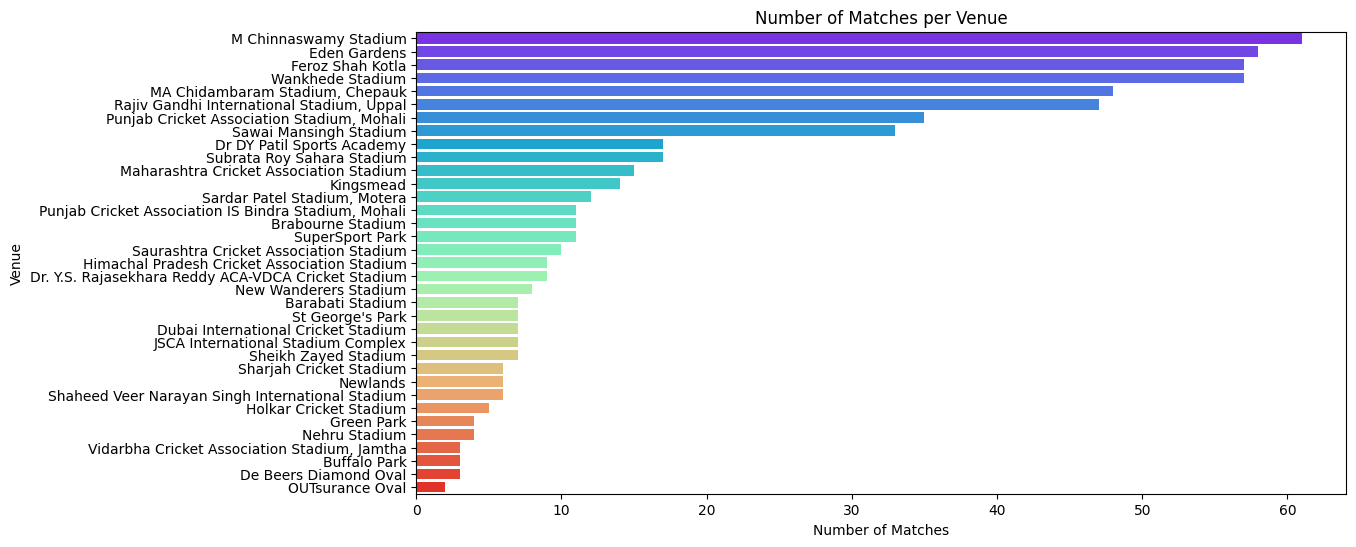

In [50]:
# Let's visualize the top 10 batsmen of Delhi Daredevils

plt.figure(figsize=(12,6))
sns.barplot(x=matches_count.values, y=matches_count.index, hue = matches_count.index, palette="rainbow")
plt.title('Number of Matches per Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

* We can observe that most number of matches have been played at M ChinnaSwamy Stadium which is home to *Royal Challengers Bangalore*.
* Followed by
    * Eden Gardens  home to Kolkata Knight Riders(KKR)                                          58
    * Feroz Shah Kotla (Delhi Daredevils)  & Wankhede Stadium (Mumbair= Indians) (Tied)         57

Next we will calculate the maximum runs scored by each batsman by grouping the data by batsman their runs. Then we’ll identify the top 10 batsmen with the highest runs and display this information using a horizontal bar chart.

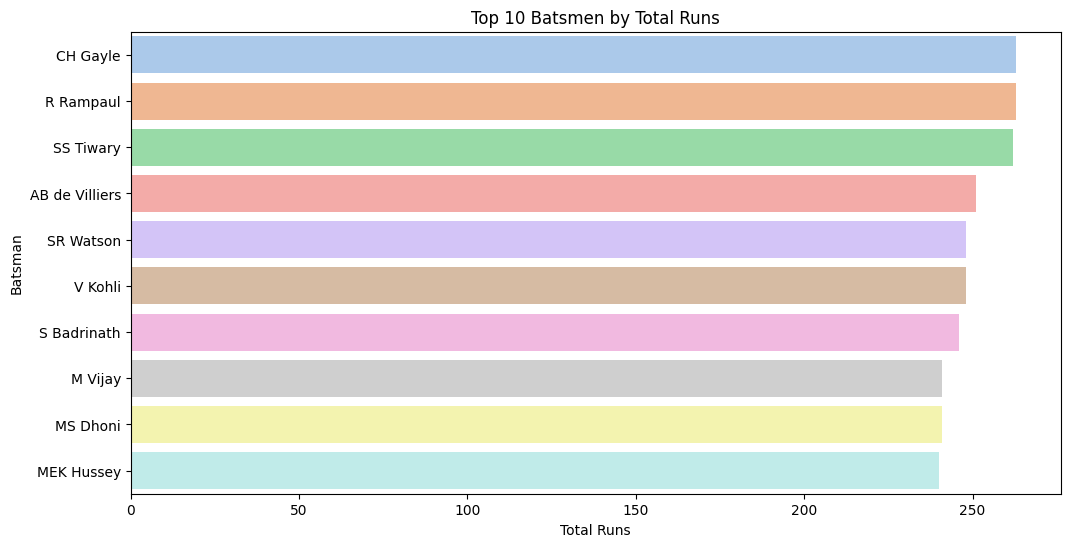

In [51]:
runs_by_batsman = new_data.groupby('batsman')['runs'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=runs_by_batsman.values, y=runs_by_batsman.index, hue=runs_by_batsman.index, palette="pastel", legend=False
)
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

Top 10 batsman based on the runs scored. This also suggests teams who were associated with top performing batsman, usually made it to the playoffs.

Now we will go ahead and do the same for bowlers. To find who were the most lethal bowlers.

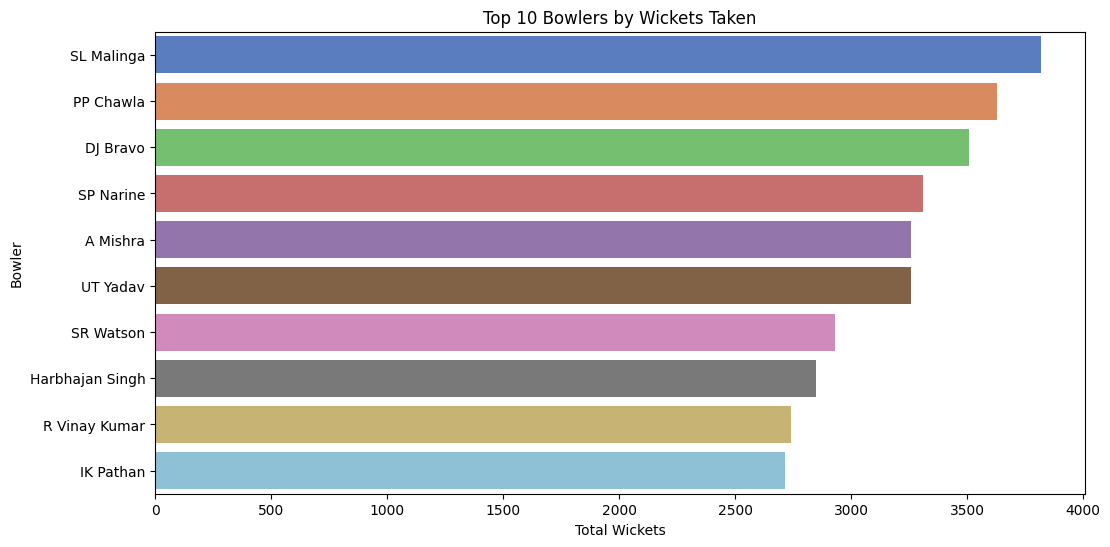

In [52]:
wickets_by_bowler = new_data.groupby('bowler')['wickets'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, hue = wickets_by_bowler.index, palette="muted")
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()


Since our end goal is to use Machine Learning to predict the top performing 11 players, we will start by doing label encoding since Machines prefer working with numerical data.

* LabelEncoder() converts text labels into integers.
* fit_transform() learns encoding and applies it.
* copy() : creates a duplicate of the DataFrame to avoid changing the original data

In [53]:
# Using Sklearn
from sklearn.preprocessing import LabelEncoder
# Categorical columns
cat_cols = ['bat_team', 'bowl_team', 'venue', 'batsman', 'bowler']
data_encoded = new_data.copy()

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

### Feature Selection
Correlation: Provides the relationship between two or more variables, indicating how change in one variable may cause a change in other variable.


Columns such as 'date' and 'mid' because they are identifiers and don't provide meaningful information for our analysis. By removing these columns we can work on providing relationships useful for modeling.


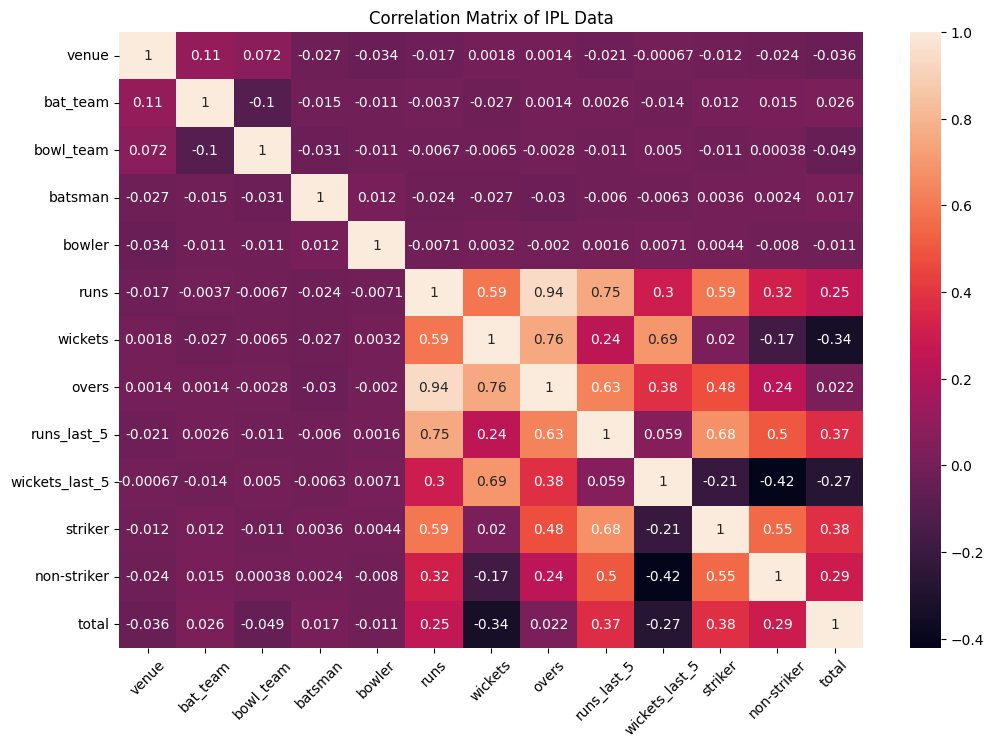

In [54]:
data_corr = data_encoded.drop(columns=['date', 'mid'], axis=1)
# Calculate the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr.corr(),annot=True)
plt.xticks(rotation=45)
plt.title('Correlation Matrix of IPL Data')
plt.show()

Based on the heatmap we will drop some features based on features that have:
* High Multicollinearity: Drop features that directly influence each other
* Lower Correlation: Features that have 0 to very low relation or may case redundancy

Based on the heatmap we will drop the columns runs_last_5, wickets_last_5 and non-striker because they show high correlation with other features. Dropping highly correlated columns helps reduce redundancy and prevents multicollinearity which can improve model performance and interpretability.

Now its time to work on the model

### Lets split the data into training and testing sets for model building and evaluation.

* train_test_split() : splits features and target into training and test subsets
* test_size=0.3 : assigns 30% of data for testing
* random_state=42 : ensures reproducible splits by fixing the random seed*

In [55]:
feature_cols = ['bat_team', 'bowl_team', 'venue', 'runs', 'wickets', 'overs', 'striker', 'batsman', 'bowler']

X = data_encoded[feature_cols]
y = data_encoded['total']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Perform Feature Scaling
We will perform Min-Max scaling on our input features to ensure all the features are on the same scale. It ensures consistent scale and improves model performance. Scaling will be done on both training and testing data using the scaling parameters.

* MinMaxScaler() scales features to [0,1] range.
* fit_transform() fits scaler on training data and transforms it.
* transform() applies same scaler to test data.

In [56]:
from sklearn.preprocessing import MinMaxScaler
# Min max scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Using Neural network to build regression model
We will build neural network using TensorFlow and Keras for regression. After building the model we have compiled the model using the Huber Loss because of the robustness of the regression against outliers.

In [57]:
# keras.Sequential() creates a stack of layers.
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),
    # Dense layers are fully connected layers.
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dense(216, activation='relu'), 
    
    # Output layer uses linear activation because it’s regression. 
    keras.layers.Dense(1, activation='linear') 
])

# Huber loss combines MSE and MAE advantages to handle outliers better.
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)

### Training the model
We train the model on the scaled training data for 10 epochs with a batch size of 64, validating on the test set.
* **epochs=10** means the model sees the whole data 10 times.
* **batch_size=64** updates weights after every 64 samples.
* **validation_data** evaluates model on test set during training.


In [58]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=
          (X_test, y_test))

Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 34.2585 - val_loss: 24.9483
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 24.6088 - val_loss: 20.5676
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 19.6744 - val_loss: 16.7108
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17.2068 - val_loss: 15.1328
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16.0690 - val_loss: 14.9685
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 15.7513 - val_loss: 18.1008
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 15.2686 - val_loss: 15.0678
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.4329 - val_loss: 15.7778
Epoch 9/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.1668 - val_loss: 14.3910
Epoch 10/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.8414 - val_loss: 14.2824


### A quick note on Loss

Loss is a measure of how far off your model is from predicting $True$ $positives$ are from actual target values.

* It is calcuklated using Mean Squared Error (MSE) for regression
* loss - training data, tells how well the model is learning from the training data
* val_loss = validation loss, tells how well the model is generalizing to unseen data

$PS$: We are using Neural Network to build regression model

Huber function used above takes care of both MSE and MAE(more robust for outliers)

Summary less Loss equates to better model.


<Axes: >

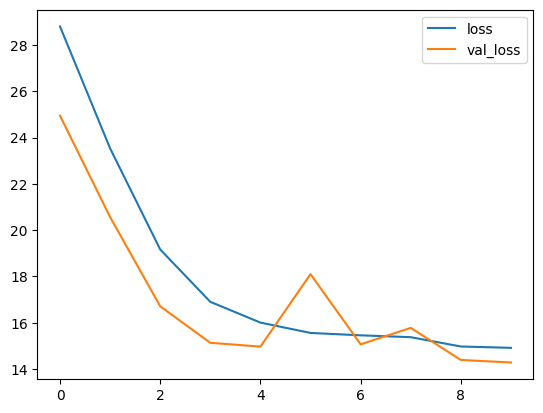

In [59]:
# Plot the loss curve
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [60]:
# evalkuating the predictions
predictions =model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step
Mean Absolute Error: 22.850133895874023
Mean Squared Error: 846.193115234375


### Creating Interactive widgets for Score Predictions
* widgets.Dropdown() creates dropdown menus.
* widgets.Button() creates a clickable button.
* predict_score() function handles user inputs, encodes and scales them, runs prediction and displays result.
* display() shows widgets in the notebook.

In [61]:
# import packages
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=list(label_encoders['venue'].classes_), description='Select Venue:')
venue.style = {'description_width': 'initial'}

batting_team = widgets.Dropdown(options=list(label_encoders['bat_team'].classes_), description='Select Batting Team:')
batting_team.style = {'description_width': 'initial'}

bowling_team = widgets.Dropdown(options=list(label_encoders['bowl_team'].classes_), description='Select Bowling Team:')
bowling_team.style = {'description_width': 'initial'}

striker = widgets.Dropdown(options=list(label_encoders['batsman'].classes_), description='Select Striker:')
striker.style = {'description_width': 'initial'}

bowler = widgets.Dropdown(options=list(label_encoders['bowler'].classes_), description='Select Bowler:')
bowler.style = {'description_width': 'initial'}

runs = widgets.IntText(value=0, description='Runs:', style={'description_width': 'initial'})
wickets = widgets.IntText(value=0, description='Wickets:', style={'description_width': 'initial'})
overs = widgets.FloatText(value=0.0, description='Overs:', style={'description_width': 'initial'})
striker_ind = widgets.IntText(value=0, description='Striker:', style={'description_width': 'initial'})  # Assuming 0 or 1
predict_button = widgets.Button(description="Predict Score")

output = widgets.Output()

def predict_score(b):
    with output:
        clear_output()
        print("Button clicked!")  # Clear previous output
        
        encoded_venue = label_encoders['venue'].transform([venue.value])[0]
        encoded_batting_team = label_encoders['bat_team'].transform([batting_team.value])[0]
        encoded_bowling_team = label_encoders['bowl_team'].transform([bowling_team.value])[0]
        encoded_striker = label_encoders['batsman'].transform([striker.value])[0]
        encoded_bowler = label_encoders['bowler'].transform([bowler.value])[0]
        
        input_features = [
            encoded_batting_team,
            encoded_bowling_team,
            encoded_venue,
            runs.value,
            wickets.value,
            overs.value,
            striker_ind.value,
            encoded_striker,
            encoded_bowler
        ]
    
        input_array = np.array(input_features).reshape(1, -1)
        input_array = scaler.transform(input_array)
        predicted_score = model.predict(input_array)
        
        
        print(f"Predicted Total Runs: {int(predicted_score[0])}")
        
predict_button.on_click(predict_score)

display(venue, batting_team, bowling_team, striker, bowler,
        runs, wickets, overs,
        striker_ind,
        predict_button, output)

Dropdown(description='Select Venue:', options=('Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park', 'De Be…

Dropdown(description='Select Batting Team:', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredev…

Dropdown(description='Select Bowling Team:', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredev…

Dropdown(description='Select Striker:', options=('A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary', 'A…

Dropdown(description='Select Bowler:', options=('A Ashish Reddy', 'A Chandila', 'A Choudhary', 'A Flintoff', '…

IntText(value=0, description='Runs:', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Wickets:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Overs:', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Striker:', style=DescriptionStyle(description_width='initial'))

Button(description='Predict Score', style=ButtonStyle())

Output()